In [1]:

import microlog.microlog as microlog
# microlog.start("Treemap-Jupyter-Notebook")

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


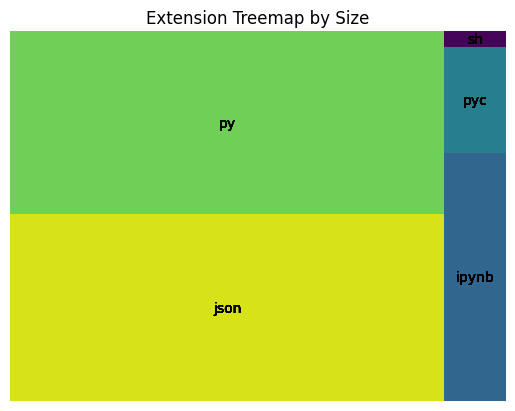

In [2]:
import sys
import squarify
import folderstats
import matplotlib.pyplot as plt


for n in range(10):
    df = folderstats.folderstats('./', ignore_hidden=True)


    # Group by extension and sum all sizes for each extension
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)

    squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
    plt.title('Extension Treemap by Size')
    plt.axis('off')

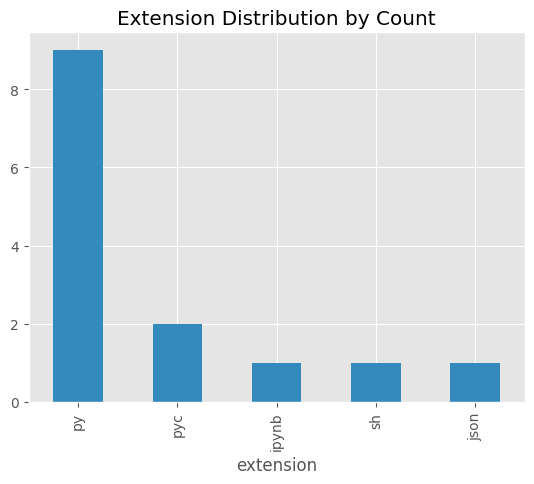

In [3]:
for n in range(10):
    with plt.style.context('ggplot'):
        df['extension'].value_counts().plot(
            kind='bar', color='C1', title='Extension Distribution by Count');

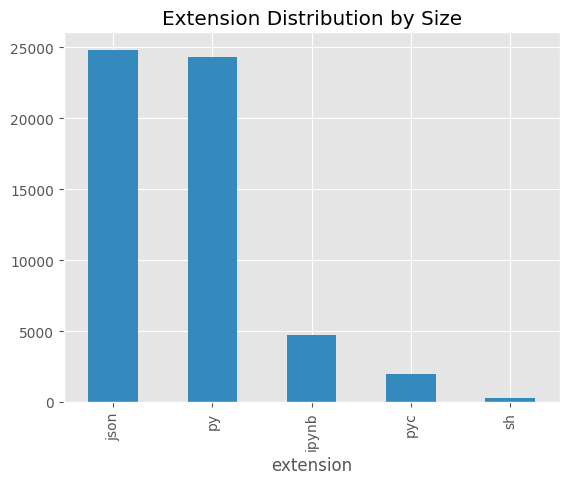

In [4]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Group by extension and sum all sizes for each extension 
        extension_sizes = df.groupby('extension')['size'].sum()
        # Sort elements by size
        extension_sizes = extension_sizes.sort_values(ascending=False)
        
        extension_sizes.plot(
            kind='bar', color='C1', title='Extension Distribution by Size');

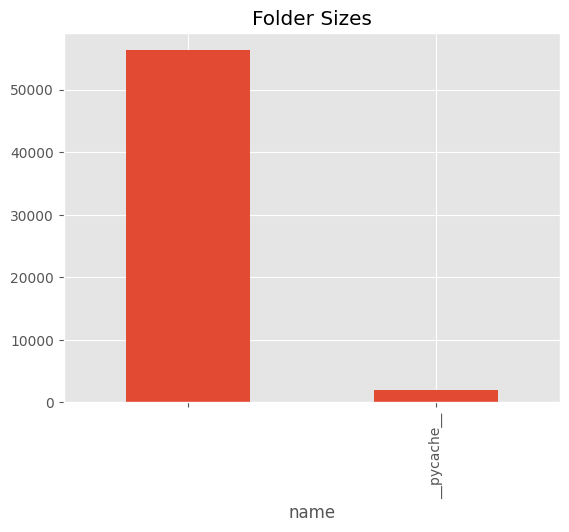

In [5]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Filter the data set to only folders
        df_folders = df[df['folder']]
        # Set the name to be the index (so we can use it as a label later)
        df_folders.set_index('name', inplace=True)
        # Sort the folders by size
        df_folders = df_folders.sort_values(by='size', ascending=False)
        
        # Show the size of the largest 50 folders as a bar plot
        df_folders['size'][:50].plot(kind='bar', color='C0', title='Folder Sizes');

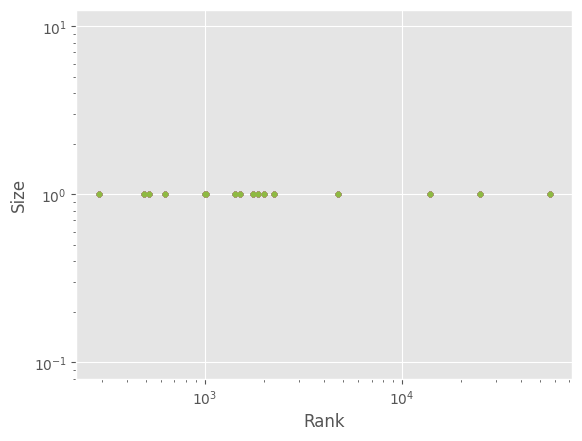

In [6]:
import numpy as np

for n in range(1000):
    with plt.style.context('ggplot'):
        y, bins = np.histogram(df['size'], bins=10000)
        plt.loglog(bins[:-1], y, '.');
        plt.ylabel('Size')
        plt.xlabel('Rank')

In [7]:
print("Import networkx")
import networkx as nx

for n in range(100):
    # Sort the index
    df_sorted = df.sort_values(by='id')

    G = nx.Graph()
    for i, row in df_sorted.iterrows():
        if row.parent:
            G.add_edge(row.id, row.parent)
print("Done. Print something to stderr.", file=sys.stderr)

Import networkx


Done. Print something to stderr.


In [8]:
import microlog.microlog as microlog
microlog.stop()